<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/025_DBSCAN%20%26%20Hierarchical%20Clustering/025_Practice%20DBSCAN%20%26%20Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 25: DBSCAN & Hierarchical Clustering

This notebook is designed for hands-on practice.



## Dataset 1: Blob Dataset with Different Densities

This dataset contains clusters with different densities.
DBSCAN should behave differently for each cluster.


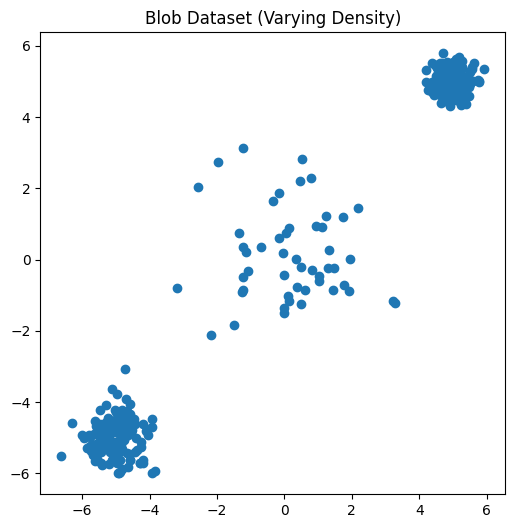

In [11]:
#Done for you
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X_blobs, _ = make_blobs(
    n_samples=[150, 50, 200],
    centers=[(-5, -5), (0, 0), (5, 5)],
    cluster_std=[0.5, 1.5, 0.3],
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.title("Blob Dataset (Varying Density)")
plt.show()


### TODO 1: Scaling

Scale the dataset using StandardScaler.

Think:
- Why is scaling important here?
- What happens if we skip scaling?


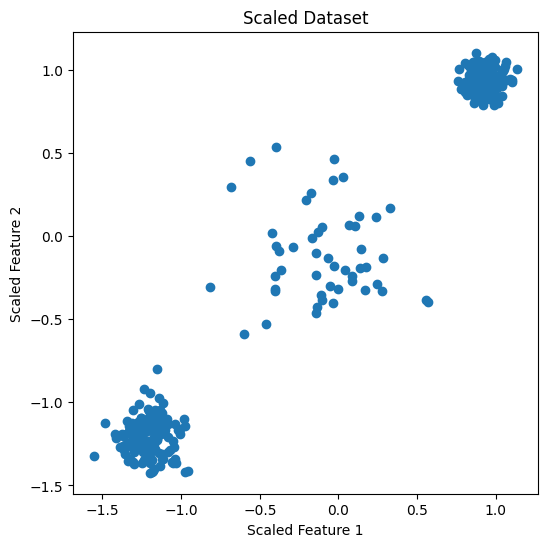

In [12]:
# TODO: Apply StandardScaler here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_blobs)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()


### TODO 2: DBSCAN on Blob Dataset

Apply DBSCAN.
Experiment with different values of eps and min_samples.


In [13]:
from sklearn.cluster import DBSCAN

# TODO: Apply DBSCAN here
dbscan = DBSCAN(eps=0.2, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)


### TODO 3: k-Distance Plot

Use a k-distance plot to estimate eps.


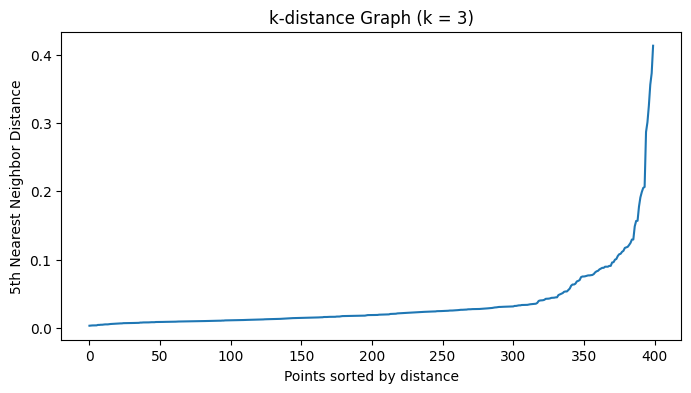

In [14]:
from sklearn.neighbors import NearestNeighbors

# TODO: Create k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbours_fit = neighbors.fit(X_scaled)
distances, indices = neighbours_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,2])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance Graph (k = 3)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


## Dataset 2: Circular Dataset

This dataset contains non-linear circular clusters.


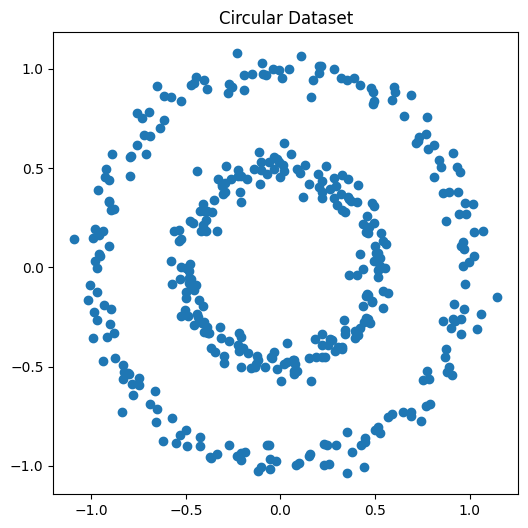

In [15]:
#Done for you
from sklearn.datasets import make_circles

X_circles, _ = make_circles(
    n_samples=400,
    factor=0.5,
    noise=0.05,
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.title("Circular Dataset")
plt.show()


### TODO 4: DBSCAN on Circular Data

Apply DBSCAN and observe cluster shape.


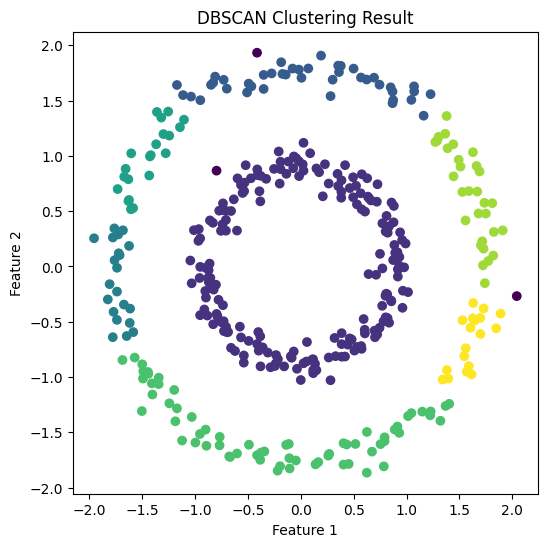

Unique cluster labels: [-1  0  1  2  3  4  5  6]


In [19]:
# TODO: Apply scaling and DBSCAN here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_circles)

dbscan = DBSCAN(eps=0.2, min_samples=3)
db_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Unique cluster labels:", np.unique(db_labels))


## Hierarchical Clustering Practice



### TODO 5: Agglomerative Clustering

Try different linkage methods:
single, complete, average, ward


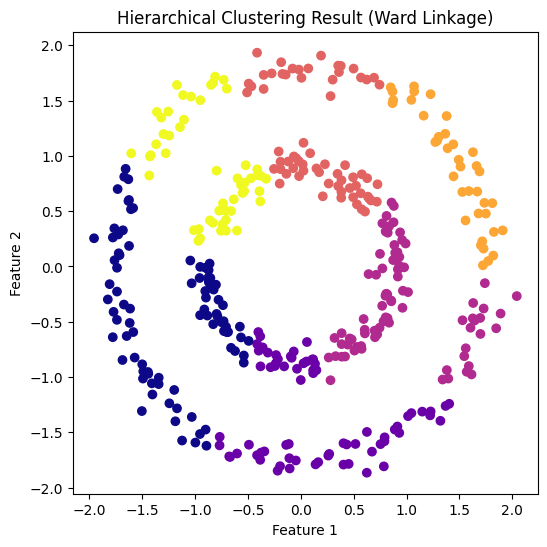

In [20]:
from sklearn.cluster import AgglomerativeClustering

# TODO: Apply hierarchical clustering here
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

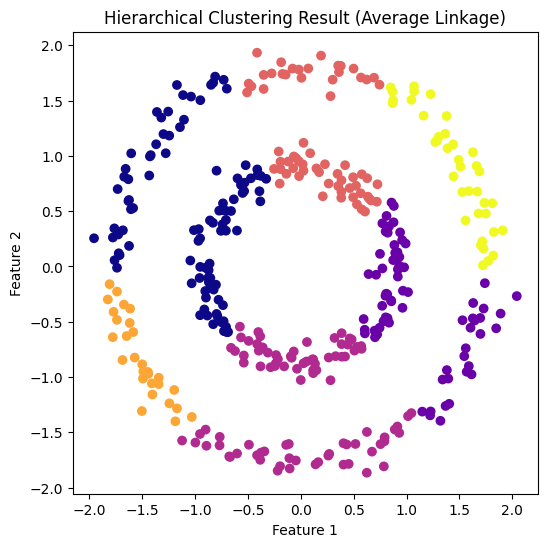

In [21]:
hc = AgglomerativeClustering(n_clusters=6, linkage='average')
hc_labels = hc.fit_predict(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Average Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

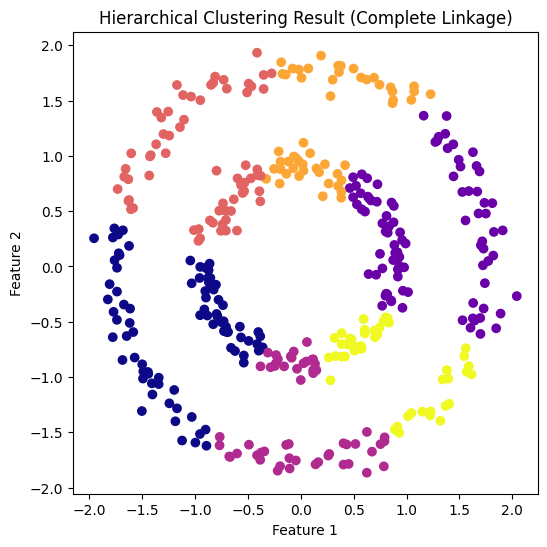

In [22]:
hc = AgglomerativeClustering(n_clusters=6, linkage='complete')
hc_labels = hc.fit_predict(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

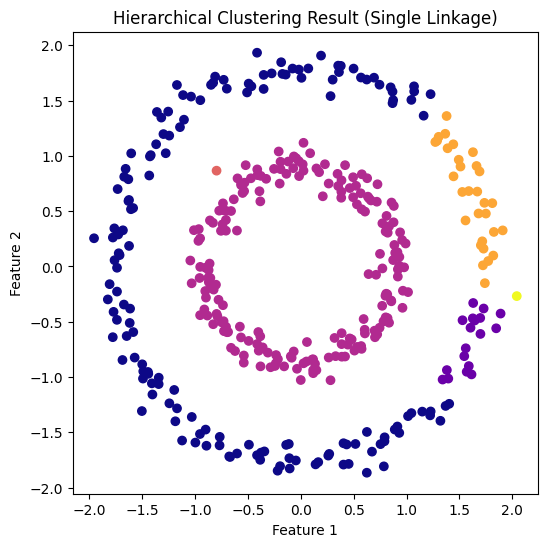

In [23]:
hc = AgglomerativeClustering(n_clusters=6, linkage='single')
hc_labels = hc.fit_predict(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Single Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### TODO 6: Dendrogram

Create a dendrogram using Ward linkage.


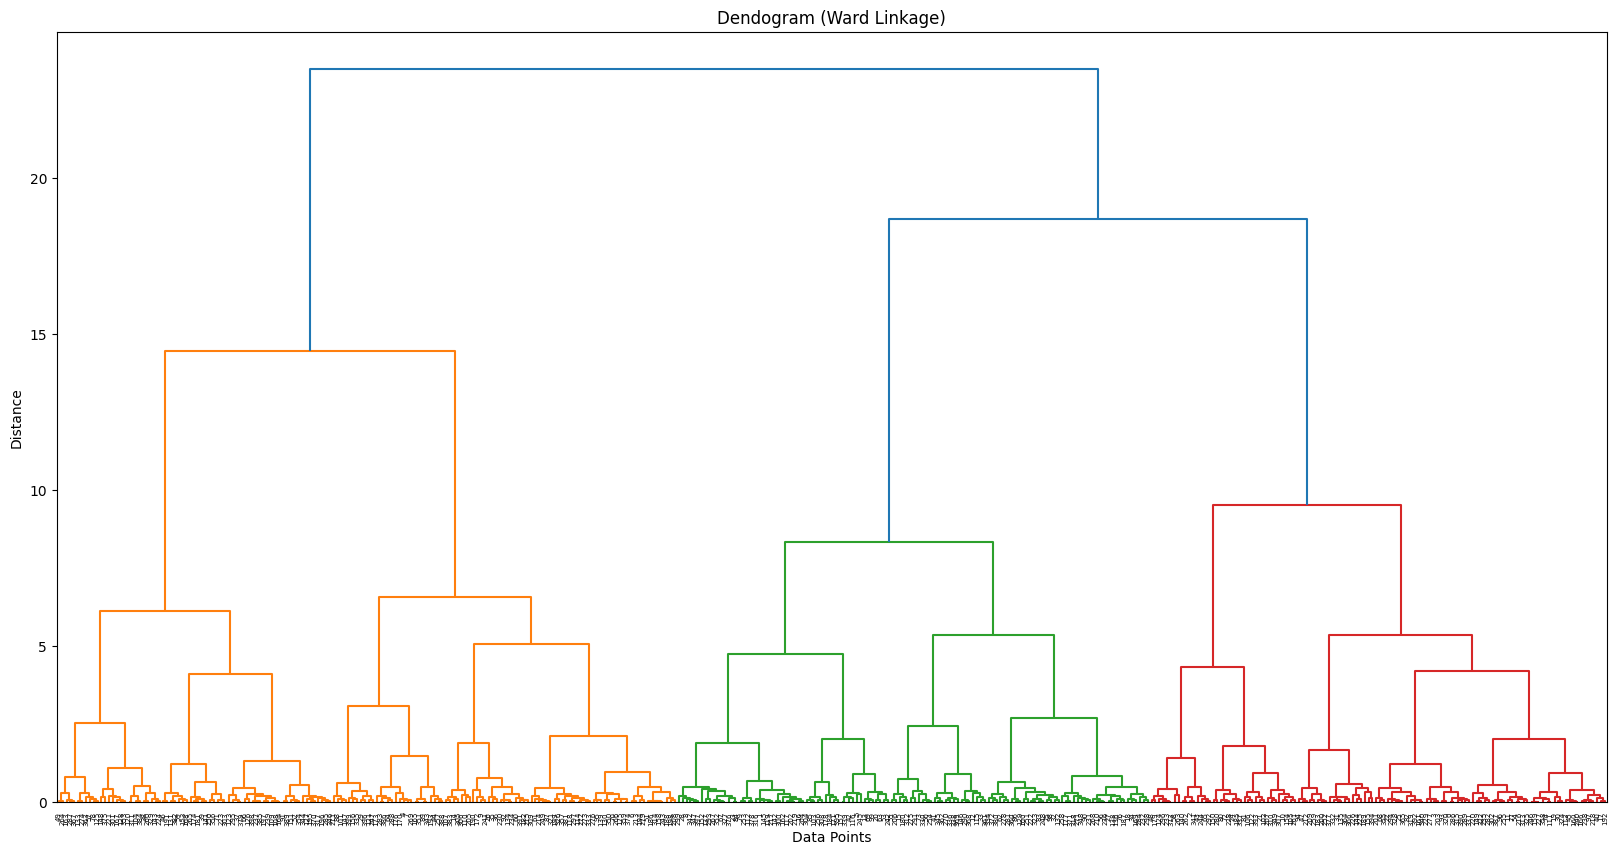

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

# TODO: Create dendrogram here
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(20,10))
dendrogram(linked)
plt.title("Dendogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


## Reflection Questions

1. Which dataset suits DBSCAN better?
2. How does eps affect noise?
3. Which linkage feels most intuitive?
4. When would you prefer hierarchical clustering?


**1.**
make_circles suits DBSCAN better because DBSCAN can naturally detect non-linear, arbitary-shaped clusters like concentric circles, while it struggles with the varying densities present in make_blobs.

**2.**
A smaller eps increases noice because fewer points have enough neighbors, while a largers eps reduces noise but may incorrectly merge separate clusters.

**3.**
Single linkage often feels the most intuitive because it merges clusters based on the closest pair of points(nearest neighbors), which is easy to undertand conceptually.

**4.**
I would prefer hierarchical clustering when I don't know the number of clusters in advance and want a dendrogram to explore cluster structure at multiple levels of detail.